**Part 1 of the HW**

*Data preprocessing. Preparing data for segmentation*

Firstly, I import necessary libraries for calculation and representation. Future necessary libraries will be added when needed.

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate                    #allows to represent information in table format
pd.set_option("display.max_columns", None)       #this allows to show all possible columns

In [268]:
df = pd.read_csv("HW1_var_1.csv", sep=";")

Let's take a first look at the data

In [269]:
df

,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,BANKACCOUNT_FLAG,Period_at_work,age,EMPL_PROPERTY,EMPL_FORM,FAMILY_STATUS,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,1,1000001,Свободная форма с печатью работодателя,Другое,1,0.35,женский,0.0,0,Высшее/Второе высшее/Ученая степень,специалист,< 50,0.0,108.0,49.0,Торговля,ООО,женат / замужем,3.0,3.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1000021,Поступление зарплаты на счет,Лечение,1,0.16,женский,0.0,0,высшее,менеджер среднего звена,>250,0.0,95.0,35.0,Торговля,ООО,холост / не замужем,0.0,0.0,0.0,0.0,0.0,0.027397,0.0,0.0,0.0,0.0,0.000000,0.0,3.0,71.0,3.0,0.0,3.0,26.0,78.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1000041,Поступление зарплаты на счет,Ремонт,1,0.15,мужской,0.0,0,среднее,специалист,>250,0.0,88.0,30.0,Производство,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1000061,2НДФЛ,Отпуск,1,0.43,женский,1.0,0,высшее,менеджер среднего звена,>250,1.0,122.0,32.0,Другое,Иная форма,женат / замужем,1.0,1.0,0.0,0.0,0.0,0.090090,1.0,1.0,0.0,0.0,0.500000,4.0,4.0,101.0,8.0,2.0,2.0,3.0,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1000081,2НДФЛ,Ремонт,1,0.29,мужской,0.0,0,высшее,менеджер высшего звена,>100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10238,1,1204761,Форма банка (без печати работодателя),Ремонт,1,0.59,женский,1.0,0,среднее-специальное,вспомогательный персонал,< 50,0.0,156.0,42.0,Торговля,ООО,женат / замужем,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.285714,2.0,5.0,132.0,7.0,2.0,1.0,15.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10239,1,1204781,2НДФЛ,Ремонт,1,0.54,мужской,0.0,0,высшее,специалист,>250,0.0,57.0,27.0,Другое,ЗАО,холост / не замужем,2.0,1.0,1.0,1.0,1.0,0.035088,0.0,0.0,0.0,0.0,1.000000,4.0,0.0,55.0,4.0,3.0,0.0,8.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10240,1,1204801,Поступление зарплаты на счет,Ремонт,1,0.51,женский,0.0,0,высшее,вспомогательный персонал,>250,0.0,378.0,51.0,Наука,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10241,1,1204821,Форма банка (без печати работодателя),Ремонт,1,0.59,женский,0.0,0,Высшее/Второе высшее/Ученая степень,вспомогательный персонал,>250,0.0,22.0,51.0,Торговля,ОАО,холост / не замужем,6.0,3.0,2.0,1.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.625000,5.0,3.0,106.0,8.0,3.0,0.0,4.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Also, it is interesting to know number of observations and columns in dataframe

In [270]:
df.shape

(10243, 44)

Before the analysis will start, it would be a good idea to look at the *correlation* between the variables. The column named "Номер варианта" and "ID" can be excluded in representation because their correlation with other variables does not make sense.

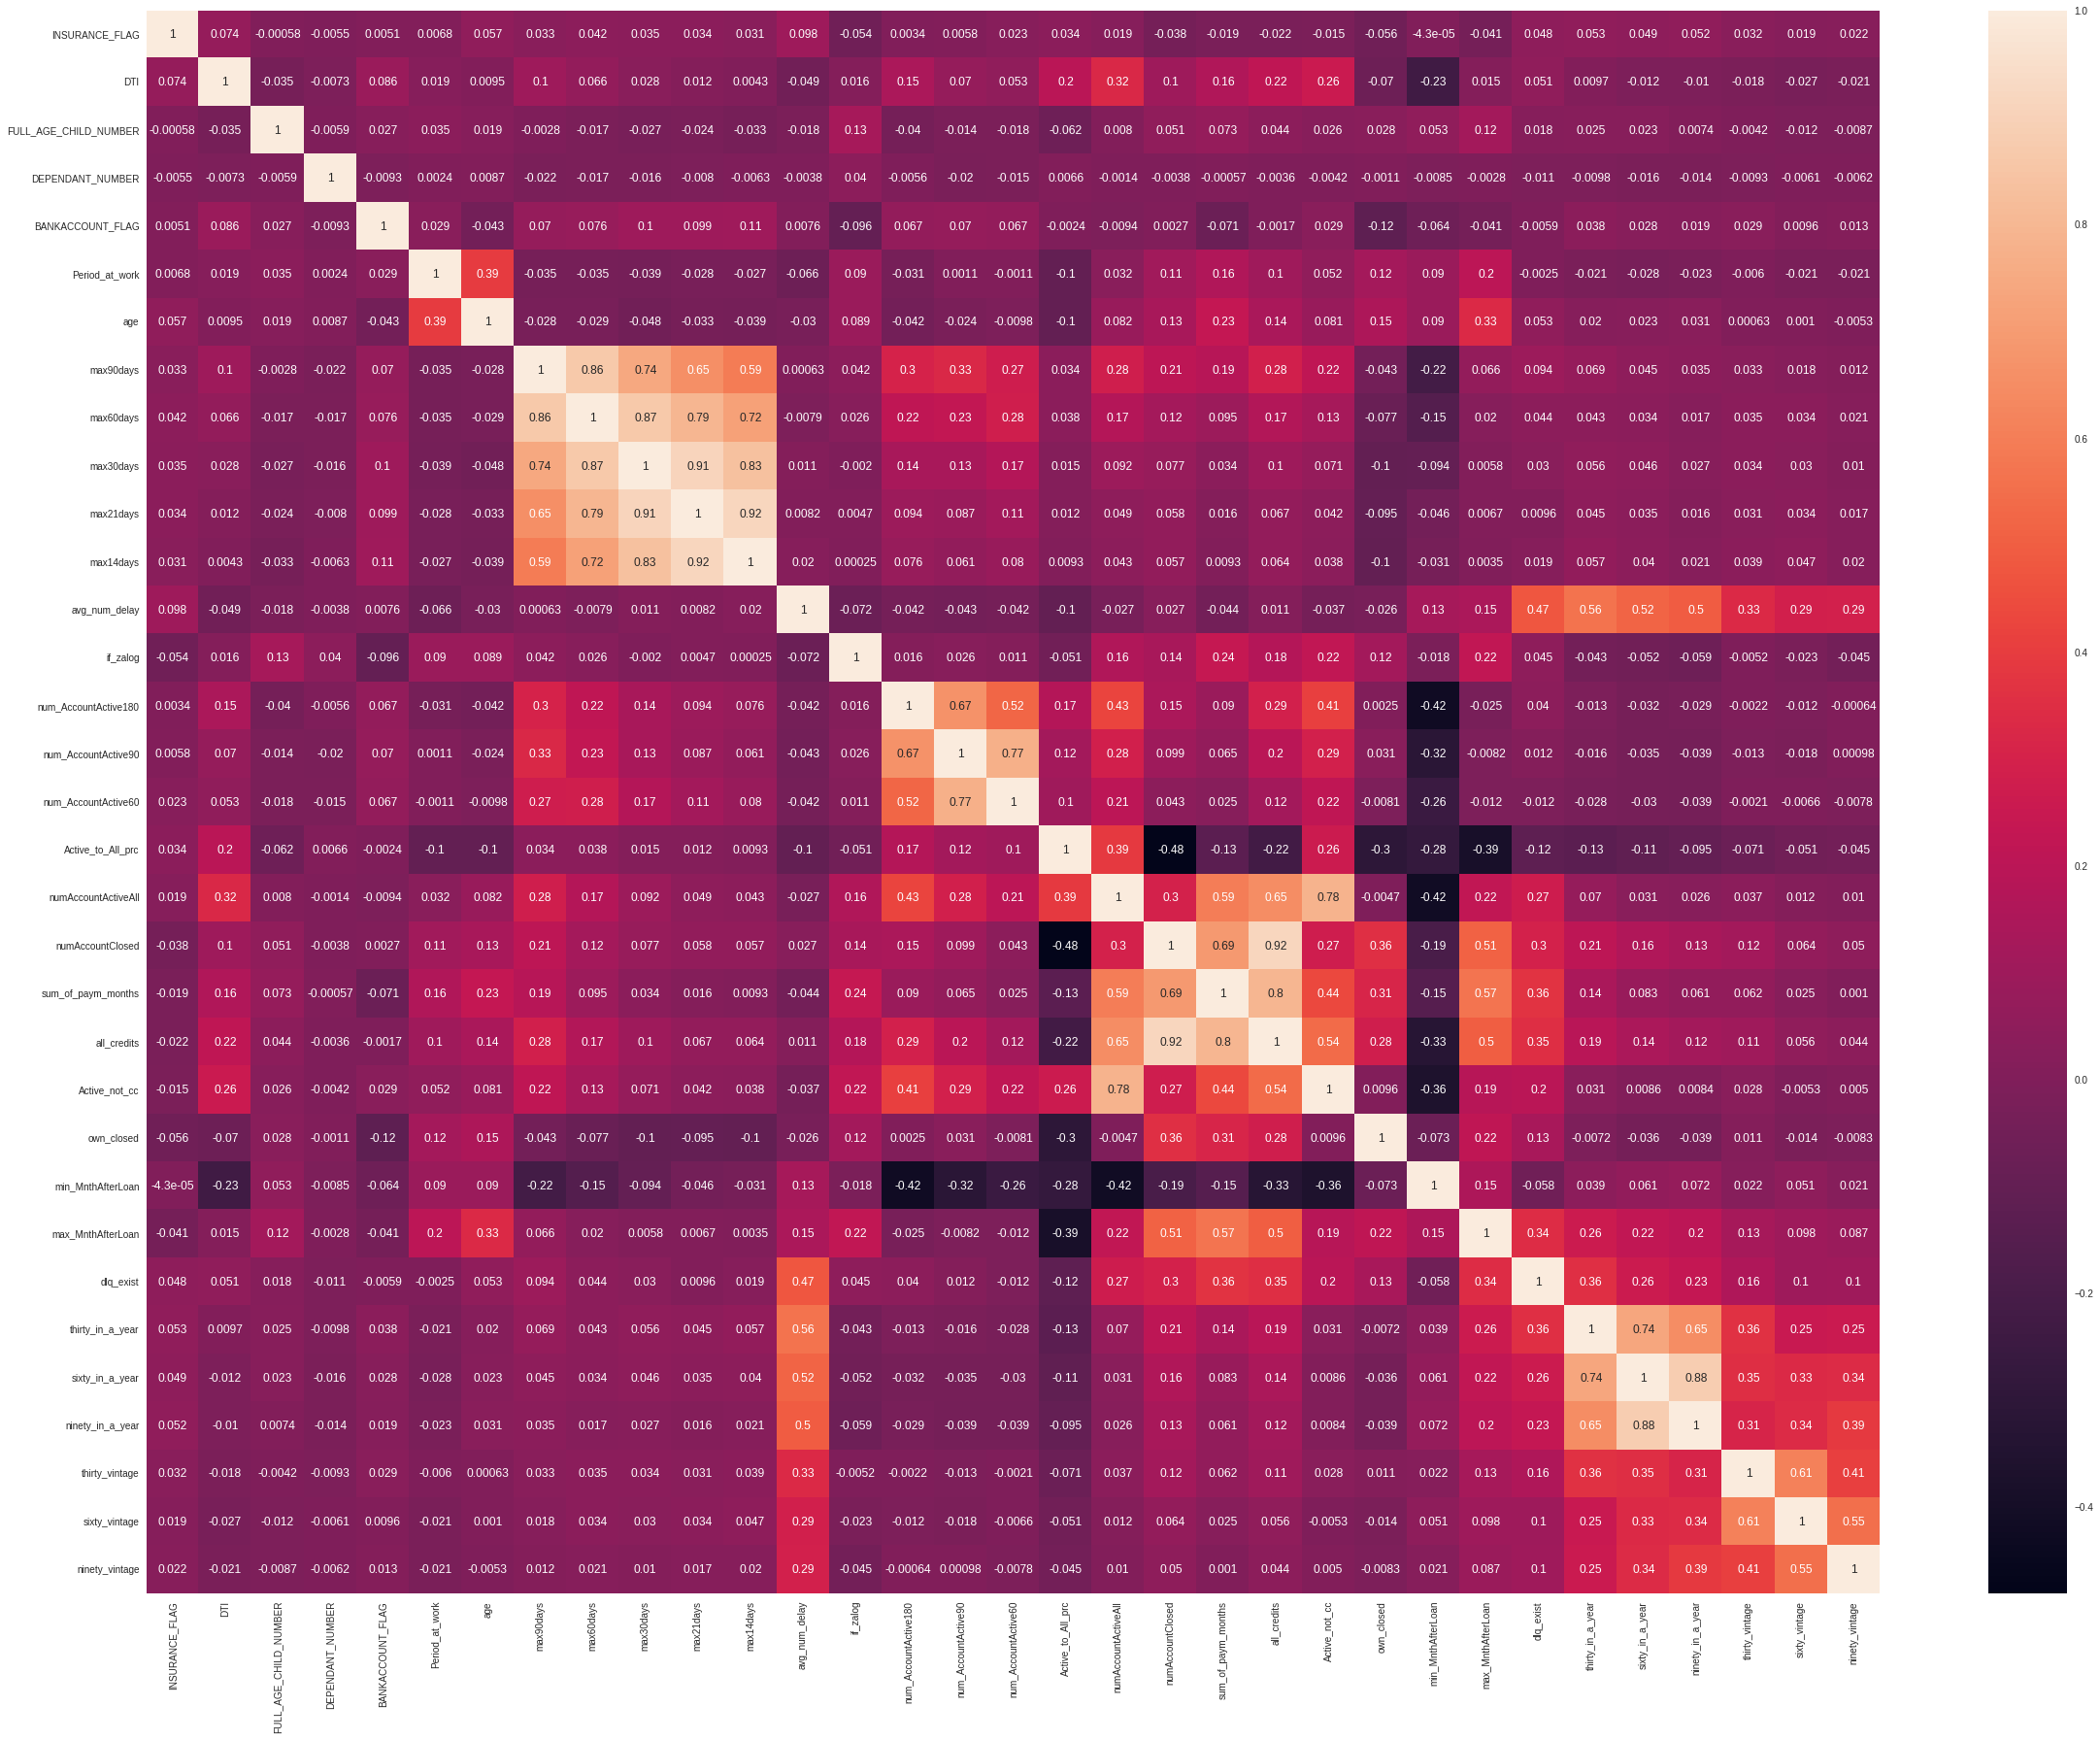

In [271]:
fig = plt.figure(figsize = (40,30))
sns.heatmap(df.drop(["Номер варианта", "ID"], axis = 1).corr(), annot = True)

As it can be seen, there are three mostly correlated combinations of variables.

1) The combination of max90days, max60days, max30days, max21days and max14days. The highest correlation here is 0.92 between variables max21days and max14days. These variables represent the number of inquiries to the credit bureaus for the last N days. Such correlation is probably due to close interconnections between variables that makes variable max21days includes the values of variable max14days and so on. 

2) The same reason of correlation can be applied to combination of these variables: num_AccountActive180, num_AccountActive90 and num_AccountActive60.

3) The last combination of Active_to_All_prc, numAccountActiveAll, numAccountClosed, sum_of_paym_months, all_credits, Active_not_cc, own_closed, min_MnthAfterLoan and max_MnthAfterLoan. The highest correlation here is 0.92 between variables all_credits and numAccountClosed. Interestingly, such correlation can be explained by the fact that the number of closed accounts directly affects the total number of credits i.e. they change in one direction: increase or decrease.

Next step is calculation of the number of unique, null and empty values + their share in % of the total number. But before that column "Номер варианта" will be dropped because it is not helpful variable for the task.

In [272]:
df = df.drop(["Номер варианта"], axis = 1)

In [273]:
def columnValues(df):
    row = [df.nunique(), round(df.nunique()*100/len(df), 1), (df==0).sum(axis=0), round((df==0).sum(axis=0)*100/len(df), 1), df.isna().sum(), round(df.isna().sum()*100/len(df), 1)]
    return row

table = []
for column in df:
    table.append([column] + columnValues(df[column]))

print(tabulate(table, headers=["Column","Count Unique", "% of unique","Count Zeros", "% of zeros", "Count NAs","% of NAs"], tablefmt="orgbtl"))

Column                   Count Unique    % of unique    Count Zeros    % of zeros    Count NAs    % of NAs
---------------------  --------------  -------------  -------------  ------------  -----------  ----------
ID                              10243          100                0           0              0         0
INCOME_BASE_TYPE                    4            0                0           0             66         0.6
CREDIT_PURPOSE                     10            0.1              0           0              0         0
INSURANCE_FLAG                      2            0             3964          38.7            0         0
DTI                                60            0.6              0           0            134         1.3
SEX                                 2            0                0           0              0         0
FULL_AGE_CHILD_NUMBER               8            0.1           6154          60.1            1         0
DEPENDANT_NUMBER                    4          

As it was previously mentioned, we have 10243 observations. Column ID also suggests that we have 10243 observations.

Some important moments:

*   The proportion of empty values is quite considerable for a dataset with 10243 rows. The maximum proportion of NAs for most variables exceeds 63%
*   The proportion of null values for most variables varies between 10% and 36%. Variable DEPENDANT_NUMBER has almost 100% of null values.

Also, there will be calculation of mean, median, standard deviation, minimum, maximum and identifying of data type for each numeric indicator in the data. Generally, following table is for numeric variables. Categorical variables are needed to be encoded and this will be done later.

In [274]:
def columnValues(df):
    row = [df.mean(), df.median(), df.std(), df.min(), df.max(), df.dtypes]
    return row

table = []
for column in df.select_dtypes(include=np.number):
    table.append([column] + columnValues(df[column]))

print(tabulate(table, headers=["Column","Mean","Median","Std","Min","Max","Data type"], tablefmt="orgbtl"))

Column                         Mean        Median            Std     Min            Max  Data type
---------------------  ------------  ------------  -------------  ------  -------------  -----------
ID                      1.10242e+06   1.10242e+06  59140.9         1e+06    1.20484e+06  int64
INSURANCE_FLAG          0.613004      1                0.487086    0        1            int64
DTI                     0.386731      0.4              0.137048    0.01     0.61         float64
FULL_AGE_CHILD_NUMBER   0.55165       0                0.775011    0        7            float64
DEPENDANT_NUMBER        0.00400273    0                0.0770704   0        3            int64
BANKACCOUNT_FLAG        0.3831        0                0.864424    0        4            float64
Period_at_work         65.6324       45               65.8236      5      503            float64
age                    36.2001       35                8.61922    23       62            float64
max90days               1.5737

Then I will examine the distribution of data by sex, age and other categorical variables.

<function matplotlib.pyplot.show(*args, **kw)>

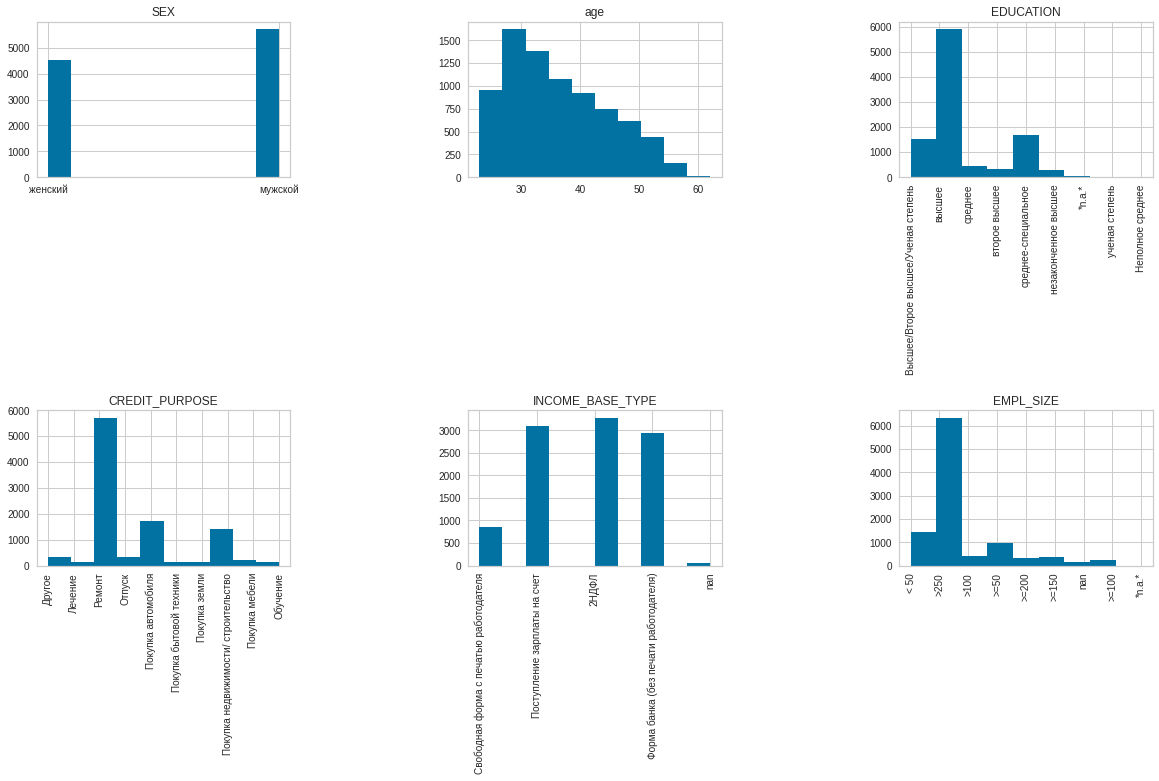

In [275]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.hist(df["SEX"])
plt.title("SEX")

plt.subplot(2, 3, 2)
plt.hist(df["age"])
plt.title("age")

#df1 = df[df.EDUCATION != "*n.a.*"]
plt.subplot(2, 3, 3)
plt.hist(df["EDUCATION"], bins = 9)
plt.title("EDUCATION")
plt.xticks(rotation = 90)


plt.subplot(2, 3, 4)
plt.hist(df["CREDIT_PURPOSE"], bins = 10)
plt.title("CREDIT_PURPOSE")
plt.xticks(rotation = 90)

df1 = df.astype({"INCOME_BASE_TYPE": str})
plt.subplot(2, 3, 5)
plt.hist(df1["INCOME_BASE_TYPE"])
plt.title("INCOME_BASE_TYPE")
plt.xticks(rotation = 90)

df1 = df.astype({"EMPL_SIZE": str})
plt.subplot(2, 3, 6)
plt.hist(df1["EMPL_SIZE"], bins=9)
plt.title("EMPL_SIZE")
plt.xticks(rotation = 90)
plt.subplots_adjust(wspace=0.7, hspace=1.5)
plt.show

Surprisingly, we have specific value "*n.a.*" in columns "EDUCATION" and "EMPL_SIZE". Also, null values are presented. After looking at distribution of categorical variables I will deal with null values and empty values by dropping them or imputing mean or median.

In [276]:
df["EMPL_SIZE"].unique()

array(['< 50', '>250', '>100', '>=50', '>=200', '>=150', nan, '>=100',
       '*n.a.*'], dtype=object)

In [277]:
df["EDUCATION"].unique()

array(['Высшее/Второе высшее/Ученая степень', 'высшее', 'среднее',
       'второе высшее', 'среднее-специальное', 'незаконченное высшее',
       '*n.a.*', 'ученая степень', 'Неполное среднее'], dtype=object)

In [278]:
df = df.replace("*n.a.*", np.NaN)

As it was mentioned above about almost 63% sparsity of dataframe, it would better to drop these rows because imputation will lead to biasedness and these 63% most probably will disappear in every most affected columns.

In [279]:
df = df.dropna(axis=0, subset=['sixty_vintage'])

In [280]:
def columnValues(df):
    row = [df.nunique(), round(df.nunique()*100/len(df), 1), (df==0).sum(axis=0), round((df==0).sum(axis=0)*100/len(df), 1), df.isna().sum(), round(df.isna().sum()*100/len(df), 1)]
    return row

table = []
for column in df:
    table.append([column] + columnValues(df[column]))

print(tabulate(table, headers=["Column","Count Unique", "% of unique","Count Zeros", "% of zeros", "Count NAs","% of NAs"], tablefmt="orgbtl"))

Column                   Count Unique    % of unique    Count Zeros    % of zeros    Count NAs    % of NAs
---------------------  --------------  -------------  -------------  ------------  -----------  ----------
ID                               3730          100                0           0              0         0
INCOME_BASE_TYPE                    4            0.1              0           0              0         0
CREDIT_PURPOSE                     10            0.3              0           0              0         0
INSURANCE_FLAG                      2            0.1           1460          39.1            0         0
DTI                                58            1.6              0           0              0         0
SEX                                 2            0.1              0           0              0         0
FULL_AGE_CHILD_NUMBER               6            0.2           2269          60.8            1         0
DEPENDANT_NUMBER                    3            0.

Next step is imputation by mean or median. It is possible because the number of missing values is not so big. Also, NAs in "EDUCATION" and "EMPL_SIZE" will be dropped because there is no right way to impute categorical value and their deletion will not affected general picture.

In [281]:
df['Period_at_work'].fillna(float(df['Period_at_work'].mean()), inplace=True)
df['FULL_AGE_CHILD_NUMBER'].fillna(float(df['FULL_AGE_CHILD_NUMBER'].median()), inplace=True)
df['max90days'].fillna(float(df['max90days'].median()), inplace=True)
df['max60days'].fillna(float(df['max60days'].median()), inplace=True)
df['max30days'].fillna(float(df['max30days'].median()), inplace=True)
df['max21days'].fillna(float(df['max21days'].median()), inplace=True)
df['max14days'].fillna(float(df['max14days'].median()), inplace=True)
df['avg_num_delay'].fillna(float(df['avg_num_delay'].mean()), inplace=True)

In [282]:
df.dropna(inplace=True)

In [283]:
def columnValues(df):
    row = [df.nunique(), round(df.nunique()*100/len(df), 1), (df==0).sum(axis=0), round((df==0).sum(axis=0)*100/len(df), 1), df.isna().sum(), round(df.isna().sum()*100/len(df), 1)]
    return row

table = []
for column in df:
    table.append([column] + columnValues(df[column]))

print(tabulate(table, headers=["Column","Count Unique", "% of unique","Count Zeros", "% of zeros", "Count NAs","% of NAs"], tablefmt="orgbtl"))

Column                   Count Unique    % of unique    Count Zeros    % of zeros    Count NAs    % of NAs
---------------------  --------------  -------------  -------------  ------------  -----------  ----------
ID                               3717          100                0           0              0           0
INCOME_BASE_TYPE                    4            0.1              0           0              0           0
CREDIT_PURPOSE                     10            0.3              0           0              0           0
INSURANCE_FLAG                      2            0.1           1452          39.1            0           0
DTI                                58            1.6              0           0              0           0
SEX                                 2            0.1              0           0              0           0
FULL_AGE_CHILD_NUMBER               6            0.2           2262          60.9            0           0
DEPENDANT_NUMBER                    3

The final step is to hot-encode categorical feature in order to make them numeric. Also, variable SEX is encoded as 0 if it is a woman,1 otherwise

In [284]:
df = pd.get_dummies(df, columns = ["INCOME_BASE_TYPE", "CREDIT_PURPOSE", "EDUCATION", "EMPL_TYPE", "EMPL_SIZE", "EMPL_PROPERTY", "EMPL_FORM", "FAMILY_STATUS"])

In [285]:
df['SEX']=np.where(df['SEX']=='женский',0,1)

**Part 2 of the HW**

Segmentation by 2 methods: KMeans and DecisionTrees

*Kmeans* segmentation

Before segmentation, we delete ID column as a purely identifying variable. However, it should be included in the final dataframe.

In [286]:
df_scaled = df.drop(["ID"], axis = 1)

Next steps:
- normalization of the data
- applying of PCA in order to reduce dimensionality of the data

In [287]:
for column in df_scaled.columns:
    df_scaled[column] = (df_scaled[column] - df_scaled[column].min()) / (df_scaled[column].max() - df_scaled[column].min()) 

In [288]:
df_scaled

,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage,INCOME_BASE_TYPE_2НДФЛ,INCOME_BASE_TYPE_Поступление зарплаты на счет,INCOME_BASE_TYPE_Свободная форма с печатью работодателя,INCOME_BASE_TYPE_Форма банка (без печати работодателя),CREDIT_PURPOSE_Другое,CREDIT_PURPOSE_Лечение,CREDIT_PURPOSE_Обучение,CREDIT_PURPOSE_Отпуск,CREDIT_PURPOSE_Покупка автомобиля,CREDIT_PURPOSE_Покупка бытовой техники,CREDIT_PURPOSE_Покупка земли,CREDIT_PURPOSE_Покупка мебели,CREDIT_PURPOSE_Покупка недвижимости/ строительство,CREDIT_PURPOSE_Ремонт,EDUCATION_Высшее/Второе высшее/Ученая степень,EDUCATION_Неполное среднее,EDUCATION_второе высшее,EDUCATION_высшее,EDUCATION_незаконченное высшее,EDUCATION_среднее,EDUCATION_среднее-специальное,EDUCATION_ученая степень,EMPL_TYPE_вспомогательный персонал,EMPL_TYPE_другое,EMPL_TYPE_менеджер высшего звена,EMPL_TYPE_менеджер по продажам,EMPL_TYPE_менеджер среднего звена,EMPL_TYPE_рабочий,EMPL_TYPE_специалист,EMPL_TYPE_торговый представитель,EMPL_SIZE_< 50,EMPL_SIZE_>250,EMPL_PROPERTY_Другое,EMPL_PROPERTY_Информационные технологии,EMPL_PROPERTY_Сельское и лесное хозяйство,EMPL_PROPERTY_Торговля,EMPL_PROPERTY_Юридические услуги,EMPL_FORM_Государственное предприятие,EMPL_FORM_ЗАО,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец / вдова,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем
1,1.0,0.245614,0.0,0.0,0.0,0.00,0.206977,0.307692,0.000000,0.000000,0.000000,0.000000,0.0,0.028767,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.096774,0.100282,0.052632,0.000000,0.3,0.252336,0.438889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.719298,0.0,0.2,0.0,0.25,0.269767,0.230769,0.043478,0.055556,0.000000,0.000000,0.0,0.094595,1.0,0.166667,0.0,0.0,0.500000,0.333333,0.129032,0.142655,0.184211,0.333333,0.2,0.037383,0.233333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.947368,0.0,0.2,0.0,0.00,0.002326,0.076923,0.043478,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.500000,0.0,0.0,0.833333,0.416667,0.032258,0.063559,0.131579,0.333333,0.0,0.046729,0.266667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1.0,0.947368,0.0,0.0,0.0,0.75,0.216279,0.256410,0.000000,0.000000,0.000000,0.000000,0.0,0.233333,0.0,0.166667,0.0,0.0,0.500000,0.083333,0.032258,0.009887,0.026316,0.000000,0.1,0.046729,0.027778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1.0,0.684211,0.0,0.0,0.0,0.00,0.086047,0.205128,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.500000,0.083333,0.032258,0.074859,0.026316,0.000000,0.1,0.261682,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0

After normalization we apply PCA with minimal number of components that explain mostly all data. Generally, we take 10 components and then plot their cumulative explained variance.

In [289]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 10)
df_ = pca.fit_transform(df_scaled)

Text(0, 0.5, 'Cumulative explained variance')

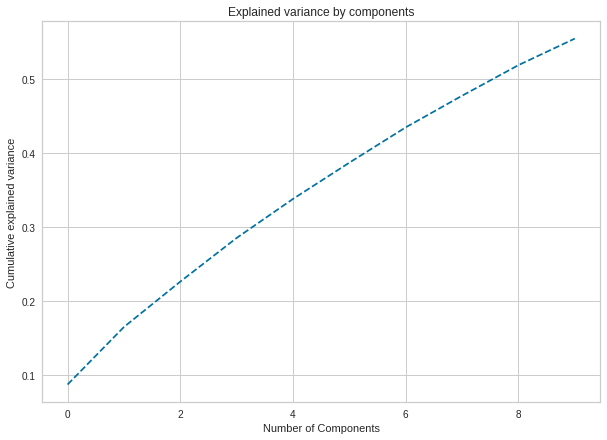

In [290]:
plt.figure(figsize = (10,7))
plt.plot(range(0,10), pca.explained_variance_ratio_.cumsum(), marker = "x", linestyle = "--")
plt.title("Explained variance by components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative explained variance")

From the plot it can be seen that we need at least 3 to 4 components. Considering 83 initial features 4 components should be enough.

In [291]:
pca = PCA(n_components = 4)
  
df_new = pca.fit_transform(df_scaled)

Now is the part of choosing the best number of clusters, **k**, by Elbow method, Silhouette score and Hierarchical graph.

In [292]:
from sklearn.cluster import KMeans

clusters_centers = []
k_values = []
    
for k in range(1, 15):
        
    kmeans_model = KMeans(n_clusters = k, n_init=20, max_iter=500, random_state=42)
    kmeans_model.fit(df_new)
        
    clusters_centers.append(kmeans_model.inertia_)
    k_values.append(k)

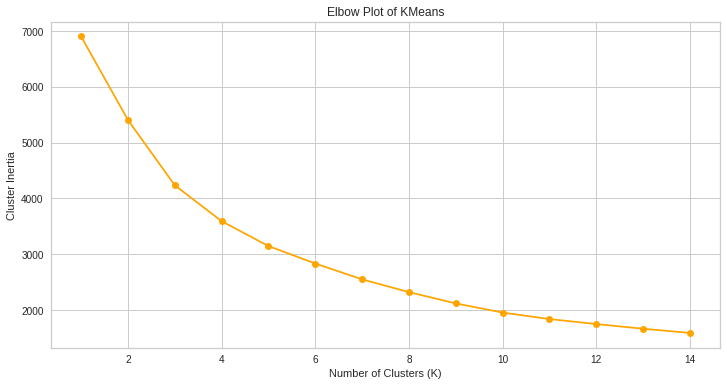

In [293]:
figure = plt.subplots(figsize = (12, 6))
plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Cluster Inertia")
plt.title("Elbow Plot of KMeans")
plt.show()

As it can be seen, the within cluster sum of squares decreases with each k. The decrease slows down sharply when the value of clusters reaches 3. From Elbow method we can conclude that optimal number is 3 or 4. But 3 clusters is quite small for segmentation. Thus, 4 is optimal value by Elbow method. Next, we will check other two methods.

In [294]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range(2, 12):  # it needs at least 2 clusters
    kmeans_model = KMeans(n_clusters = k, n_init=20, max_iter=500, random_state=42)
    kmeans_model.fit(df_new)
        
    score = silhouette_score(df_new, kmeans_model.labels_)
    silhouette_coefficients.append(score)

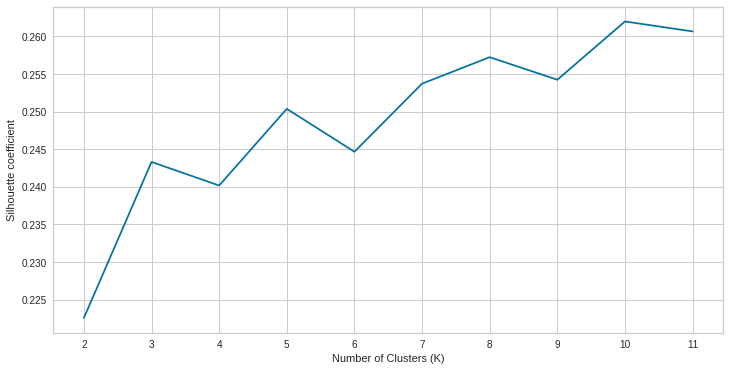

In [295]:
figure = plt.subplots(figsize = (12, 6))
plt.plot(range(2, 12), silhouette_coefficients)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette coefficient")
plt.show()

The silhouette method measures how similar a data point is to its own cluster compared to the closest neighbor cluster. Silhoutte method suggests 3 clusters or 5 clusters. 7 and so on clusters are not considered because it is too many.  Next method will help to decide final value of clusters.

Text(0, 0.5, 'Euclidean Distance')

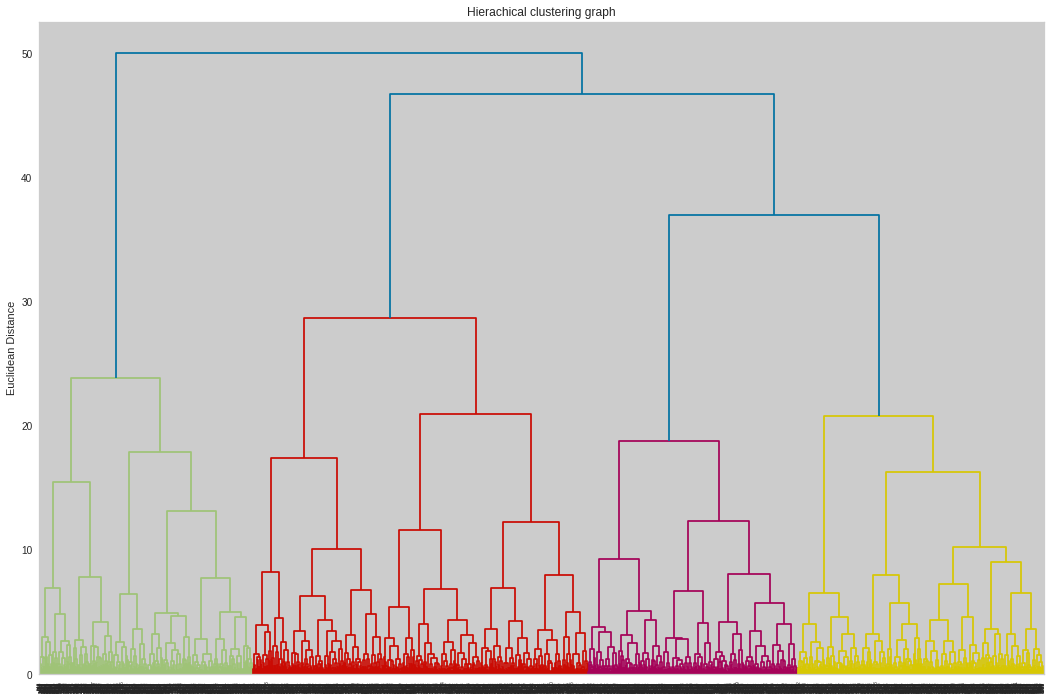

In [296]:
import scipy.cluster.hierarchy as hier

plt.figure(figsize=(18,12))
heirachical_graph=hier.dendrogram(hier.linkage(df_new, method='ward'))
plt.title('Hierachical clustering graph')
plt.ylabel('Euclidean Distance')

From the graph, we can see that the four clusters connected by the blue line have the largest Euclidean distance. So, the hierarchical graph suggests 4 clusters as Elbow method. Thus, we will use KMeans with 4 clusters.

In [297]:
kmeans_model = KMeans(n_clusters = 4, n_init=20, max_iter=500, random_state=42)
kmeans_model.fit(df_new)

KMeans(max_iter=500, n_clusters=4, n_init=20, random_state=42)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


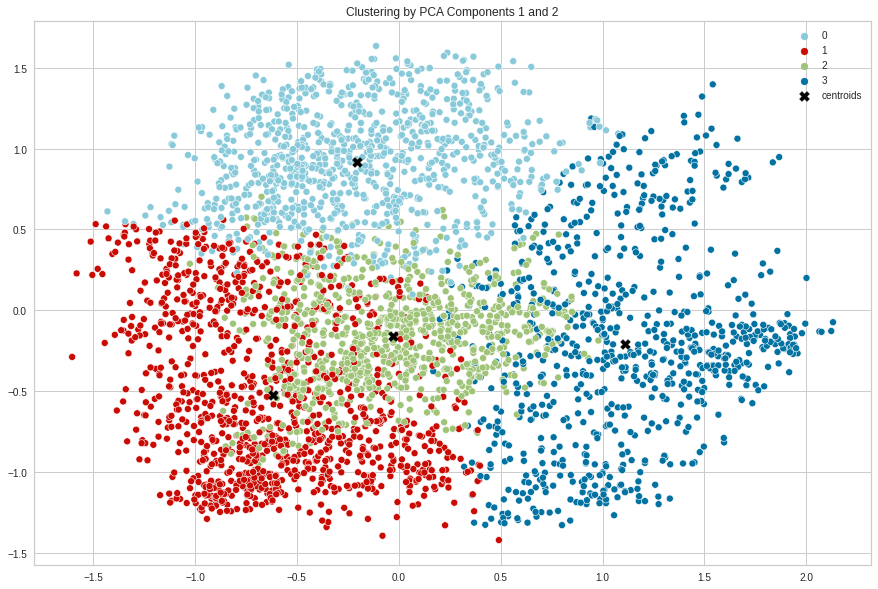

In [298]:
plt.figure(figsize = (15,10))
sns.scatterplot(df_new[:, 0], df_new[:, 1], hue=kmeans_model.labels_, palette = ['c', 'r', 'g', 'b'])
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], marker="X", c="black", s=100, label="centroids")
plt.title("Clustering by PCA Components 1 and 2")
plt.legend()
plt.show()

Before start of segmentation, let's discuss advantages and disadvantages of KMeans clustering algorithm:


Advantages:
*   KMeans is scalable to large datasets. So, as in our case KMeans did its job well 
*   The results are easy to interpret. With the help of this method it is possible to visualize the partitioning into clusters in a clear way
*   Compared to other clustering methods, KMeans clustering algorithm is fast and efficient in terms of its computational cost


Disadvantages:
*   The choice of optimal number of clusters is up to programmer. 
*   Changing or rescaling the dataset either through normalization or standardization will completely change the final results.





In [299]:
df["clusters"] = kmeans_model.labels_

In [300]:
def columnValues(column):
    cluster0 = df.loc[df['clusters'] == 0, column].mean()
    cluster1 = df.loc[df['clusters'] == 1, column].mean()
    cluster2 = df.loc[df['clusters'] == 2, column].mean()
    cluster3 = df.loc[df['clusters'] == 3, column].mean()
    #cluster4 = df.loc[df['clusters'] == 4, column].mean()
    row = [cluster0, cluster1, cluster2, cluster3]
    return row

table = []
for column in df:
    table.append([column] + columnValues(column))

print(tabulate(table, headers=["Mean of cluster","Cluster 1","Cluster 2","Cluster 3","Cluster 4"], tablefmt="orgbtl"))

Mean of cluster                                             Cluster 1     Cluster 2     Cluster 3      Cluster 4
-------------------------------------------------------  ------------  ------------  ------------  -------------
ID                                                        1.09426e+06   1.09316e+06   1.10425e+06    1.10132e+06
INSURANCE_FLAG                                            0.594764      0.657116      0.57483        0.600251
DTI                                                       0.390764      0.401312      0.392415       0.361466
SEX                                                       0.664921      0.328096      0.505669       0.570175
FULL_AGE_CHILD_NUMBER                                     0.697382      0.18854       0.611111       0.682957
DEPENDANT_NUMBER                                          0.0052356     0.000924214   0.00453515     0.0037594
BANKACCOUNT_FLAG                                          0.376963      0.37061       0.340136       0.107769


In [301]:
def columnValues(column):
    cluster0 = df.loc[df['clusters'] == 0, column].median()
    cluster1 = df.loc[df['clusters'] == 1, column].median()
    cluster2 = df.loc[df['clusters'] == 2, column].median()
    cluster3 = df.loc[df['clusters'] == 3, column].median()
    #cluster4 = df.loc[df['clusters'] == 4, column].median()
    row = [cluster0, cluster1, cluster2, cluster3]
    return row

table = []
for column in df:
    table.append([column] + columnValues(column))

print(tabulate(table, headers=["Median of cluster","Cluster 1","Cluster 2","Cluster 3","Cluster 4"], tablefmt="orgbtl"))

Median of cluster                                           Cluster 1     Cluster 2     Cluster 3     Cluster 4
-------------------------------------------------------  ------------  ------------  ------------  ------------
ID                                                        1.09104e+06   1.08088e+06   1.10797e+06   1.10009e+06
INSURANCE_FLAG                                            1             1             1             1
DTI                                                       0.4           0.42          0.41          0.37
SEX                                                       1             0             1             1
FULL_AGE_CHILD_NUMBER                                     1             0             0             0
DEPENDANT_NUMBER                                          0             0             0             0
BANKACCOUNT_FLAG                                          0             0             0             0
Period_at_work                                   



1.   Cluster 1: mostly men, 36 years old, most probably married, have a child, salary is over 250 thousand a month, working period is 50 days, IT specialist, credit purpose is repairing, already overdue a loan and had 5 loans, closes loans with high probability. 

Segment findings: 
- Very capable of working.
- Highly dependable: may fall behind on payments but still pay back the loan
- Highly likely will take a loan again
- Highly likely to default on their payments

2.   Cluster 2: mostly women, 31 years old, single, without a child, salary is over 250 thousand a month, working period is 34 days, IT specialist, credit purpose is repairing, already overdue a loan and had 4 loans, closes loans with 0.55 probability. 

Segment findings: 
- With a consistent high level of earnings
- Taking a lot of credit
- Highly likely will take a loan again
- Independable: may not pay back the loan

3.   Cluster 3: mostly men, 33 years old, most probably married, without a child, salary is over 250 thousand a month, working period is 38 days, IT specialist, credit purpose is repairing, do not overdue a loan and had 4 loans, closes loans with 0.59 probability. 

Segment findings: 
- With a consistent high level of earnings
- Taking a lot of credit
- Highly likely will take a loan again 
- Keep track of their credit history and have no delinquencies payments

4.    Cluster 4: mostly men, 37 years old, most probably married, without a child, salary is less than 50 thousand a month, working period is 40 days, senior manager, credit purpose is repairing, already overdue a loan and had 5 loans, closes loans with high probability, has taken out a loan with a pledge

Segment findings: 
- Very capable of working.
- Highly dependable: may fall behind on payments but still pay back the loan
- Highly likely will take a loan again
- Highly likely to default on their payments
- With a consistent low level of earnings



Segmentation without a teacher using k-means yielded pretty good results by identifying 4 groups of clients.

*DecisionTrees* segmentation

The next method of segmentation is supervised learning. So, we need target variable. The target variable will be combination of existed variables implying that there is no debt, there is at least 1 closed loan and 1 active credit account.

In [302]:
df5 = df.copy()

In [303]:
df5['reliable_client']=np.where(((df5['dlq_exist'] == 0) & (df5["own_closed"] >= 1) & (df5["Active_not_cc"] >= 1)),1,0)

In [304]:
(df5['reliable_client']==1).sum().sum()

310

Separation of target and training variables

In [305]:
X = df5.drop('reliable_client', axis=1)
y = df5['reliable_client']

Process of splitting data to train and test datasets

In [306]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Implementation of DecisionTreeClassifier

In [307]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

classifier = DecisionTreeClassifier(random_state=42, max_depth = 7).fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("Accuracy of the model: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy of the model:  1.0
[[1024    0]
 [   0   92]]


Implementation of RandomForestClassifier. Generally, it is just set of ordinary Decision Trees Classifier giving overall accuracy over 100 times.

In [308]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, max_depth = 7).fit(X_train, y_train)
  
y_pred = clf.predict(X_test)
print("Accuracy of the model: ", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy of the model:  0.9802867383512545
[[1024    0]
 [  22   70]]


Visualization of one tree from the set

In [309]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


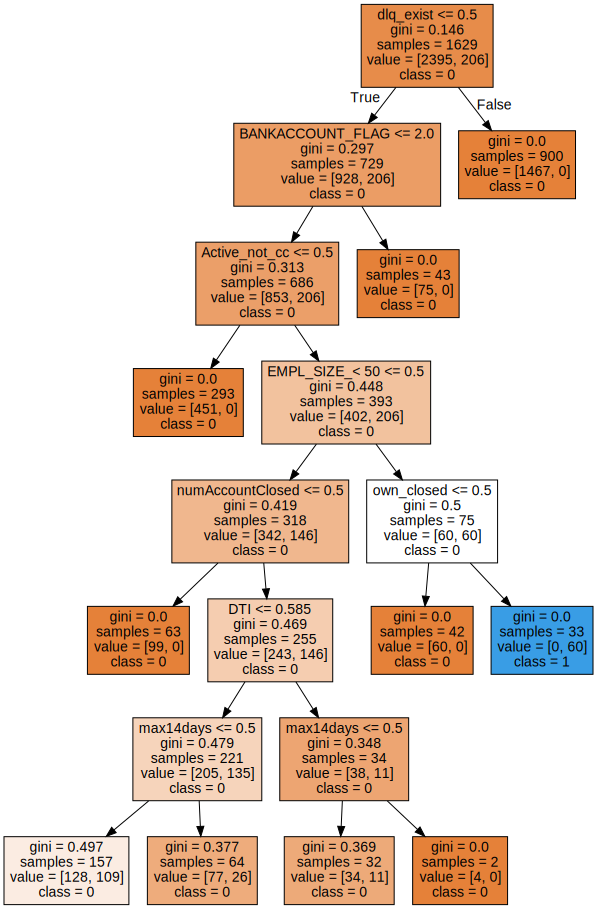

In [310]:
from sklearn import tree
import graphviz

estimator = clf.estimators_[50]
dot_data = tree.export_graphviz(estimator, out_file=None, 
                                feature_names=X_train.columns,
                                class_names = "01",  
                                filled=True)
graphviz.Source(dot_data, format="png") 

In [311]:
df = pd.concat([df.reset_index(drop = True), pd.DataFrame(clf.predict(X))], axis = 1)
df.rename(columns = {0:'reliable_client'}, inplace = True )
df

,ID,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage,INCOME_BASE_TYPE_2НДФЛ,INCOME_BASE_TYPE_Поступление зарплаты на счет,INCOME_BASE_TYPE_Свободная форма с печатью работодателя,INCOME_BASE_TYPE_Форма банка (без печати работодателя),CREDIT_PURPOSE_Другое,CREDIT_PURPOSE_Лечение,CREDIT_PURPOSE_Обучение,CREDIT_PURPOSE_Отпуск,CREDIT_PURPOSE_Покупка автомобиля,CREDIT_PURPOSE_Покупка бытовой техники,CREDIT_PURPOSE_Покупка земли,CREDIT_PURPOSE_Покупка мебели,CREDIT_PURPOSE_Покупка недвижимости/ строительство,CREDIT_PURPOSE_Ремонт,EDUCATION_Высшее/Второе высшее/Ученая степень,EDUCATION_Неполное среднее,EDUCATION_второе высшее,EDUCATION_высшее,EDUCATION_незаконченное высшее,EDUCATION_среднее,EDUCATION_среднее-специальное,EDUCATION_ученая степень,EMPL_TYPE_вспомогательный персонал,EMPL_TYPE_другое,EMPL_TYPE_менеджер высшего звена,EMPL_TYPE_менеджер по продажам,EMPL_TYPE_менеджер среднего звена,EMPL_TYPE_рабочий,EMPL_TYPE_специалист,EMPL_TYPE_торговый представитель,EMPL_SIZE_< 50,EMPL_SIZE_>250,EMPL_PROPERTY_Другое,EMPL_PROPERTY_Информационные технологии,EMPL_PROPERTY_Сельское и лесное хозяйство,EMPL_PROPERTY_Торговля,EMPL_PROPERTY_Юридические услуги,EMPL_FORM_Государственное предприятие,EMPL_FORM_ЗАО,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец / вдова,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем,clusters,reliable_client
0,1000021,1,0.16,0,0.0,0,0.0,95.0,35.0,0.0,0.0,0.0,0.0,0.0,0.027397,0.0,0.0,0.0,0.0,0.000000,0.0,3.0,71.0,3.0,0.0,3.0,26.0,78.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
1,1000061,1,0.43,0,1.0,0,1.0,122.0,32.0,1.0,1.0,0.0,0.0,0.0,0.090090,1.0,1.0,0.0,0.0,0.500000,4.0,4.0,101.0,8.0,2.0,2.0,3.0,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,1000101,0,0.56,0,1.0,0,0.0,7.0,26.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,3.0,0.0,0.0,0.833333,5.0,1.0,45.0,6.0,2.0,0.0,4.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,2,0
3,1000121,1,0.56,0,0.0,0,3.0,99.0,33.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,1.0,0.0,0.0,0.500000,1.0,1.0,7.0,2.0,0.0,1.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
4,1000161,1,0.41,0,0.0,0,0.0,43.0,31.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.500000,1.0,1.0,53.0,2.0,0.0,1.0,27.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712,1204641,0,0.59,0,0.0,0,0.0,27.0,30.0,1.0,0.0,0.0,0.0,0.0,0.021739,0.0,1.0,0.0,0.0,0.500000,6.0,6.0,90.0,12.0,3.0,0.0,5.0,91.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
3713,1204661,0,0.19,0,0.0,0,0.0,37.0,43.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.500000,4.0,4.0,131.0,8.0,1.0,1.0,17.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Before start of segmentation, let's discuss advantages and disadvantages of DecisionTrees:


Advantages:
*   It is easy to understand and interpret. Also, it can visualised
*   A little data preparation is required. Other methods often require normalizing the data, creating dummy variables and removing empty values
*   The cost of using the tree is logarithmic in the number of data points used to train the tree


Disadvantages:
*   Decision tree can create trees that are too complex and do not generalize well to the data. This is called overfitting
*   Decision tree create biased trees if some classes dominate

In [312]:
def columnValuess(column):

    r_mean = df[df['reliable_client'] == 1, column].mean()
    n_mean = df.loc[df['reliable_client'] == 0, column].mean()
    r_median = df[df['reliable_client'] == 1, column].median()
    n_median = df.loc[df['reliable_client'] == 0, column].median()
    
    row = [r_mean, n_mean, r_median, n_median]
    return row

table = []
for column in df:
    table.append([column] + columnValues(column))

print(tabulate(table, headers=["Column","Mean of Reliable","Mean of not Reliable","Median of Reliable","Median of not Reliable"], tablefmt="orgbtl"))

Column                                                     Mean of Reliable    Mean of not Reliable    Median of Reliable    Median of not Reliable
-------------------------------------------------------  ------------------  ----------------------  --------------------  ------------------------
ID                                                              1.09104e+06             1.08088e+06           1.10797e+06               1.10009e+06
INSURANCE_FLAG                                                  1                       1                     1                         1
DTI                                                             0.4                     0.42                  0.41                      0.37
SEX                                                             1                       0                     1                         1
FULL_AGE_CHILD_NUMBER                                           1                       0                     0                         0
D

1.   Reliable clients: mostly men, 33 years old, most probably married, without a child, salary is over 250 thousand a month, working period is 38 days, credit purpose is repairing, do not overdue a loan and had 4 loans,closes loans with low probability.

Segment findings: 
- Highly dependable: may fall behind on payments but still pay back the loan
- Highly likely will take a loan again
- Highly likely to not default on their payments

2.   Unreliable clients: mostly men, 37 years old, most probably married, without a child, salary is over 250 thousand a month, working period is 40 days, credit purpose is repairing, already overdue a loan and had 5 loans, closes loans with high probability,has taken out a loan with a pledge.

Segment findings: 
- With a consistent high level of earnings
- Taking a lot of credit
- Highly likely will take a loan again
- Dependable: pay back the loan

Segmentation with a teacher using DecisionTree yielded controversial results because reliable clients do not close credit accounts unlike unreliable. The reason may be due to biasedness of trees.